# Random Forests

## Setup

In [6]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("Ensemble-Learning-Notebooks"):
    raise ValueError("Please change working directory to 'path/Ensemble-Learning-Notebooks' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/Ensemble-Learning-Notebooks


In [7]:
!pip install -r requirements.txt

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Generation

In [9]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [10]:
from sklearn.datasets import load_iris, fetch_openml

iris = load_iris(as_frame=True)
X_mnist, y_mnist = fetch_openml("mnist_784", return_X_y=True, as_frame=False)

## Building a Random Forest Classifier with Bagging

In [11]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(max_features="sqrt", max_leaf_nodes=16),
    n_estimators=500, n_jobs=-1, random_state=42
)

bag_clf.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='sqrt',
                                                   max_leaf_nodes=16),
                  n_estimators=500, n_jobs=-1, random_state=42)

In [12]:
y_pred_rf_bag = bag_clf.predict(X_test)

## Building a Random Forest Classifier with Sklearn

In [13]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, 
                                 n_jobs=-1, random_state=42)

rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [14]:
y_pred_rf = rnd_clf.predict(X_test)

In [15]:
print("Random Forest with Sklearn = ", rnd_clf.score(X_test, y_test))
print("Random Forest with Bagging = ", bag_clf.score(X_test, y_test))

Random Forest with Sklearn =  0.912
Random Forest with Bagging =  0.912


In [16]:
np.array_equal(y_pred_rf_bag, y_pred_rf)

True

## Extra-Trees

In [17]:
from sklearn.ensemble import ExtraTreesClassifier
extra_tree_clf = ExtraTreesClassifier(n_estimators=500, max_leaf_nodes=16, 
                                      n_jobs=-1, random_state=42)

extra_tree_clf.fit(X_train, y_train)

ExtraTreesClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                     random_state=42)

In [18]:
extra_tree_clf.score(X_test, y_test)

0.912

## Feature Importance Analysis

In [19]:
rnd_clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)

rnd_clf.fit(iris.data, iris.target)


RandomForestClassifier(n_estimators=1000, n_jobs=-1, random_state=42)

In [20]:
rnd_clf.feature_importances_

array([0.10576086, 0.02175132, 0.43646402, 0.43602381])

In [21]:
print("Feature Importances: ")
for score, name in zip(rnd_clf.feature_importances_, iris.data.columns):
    print("-", round(score, 2), name)

Feature Importances: 
- 0.11 sepal length (cm)
- 0.02 sepal width (cm)
- 0.44 petal length (cm)
- 0.44 petal width (cm)


In [23]:
rnd_clf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rnd_clf.fit(X_mnist, y_mnist)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

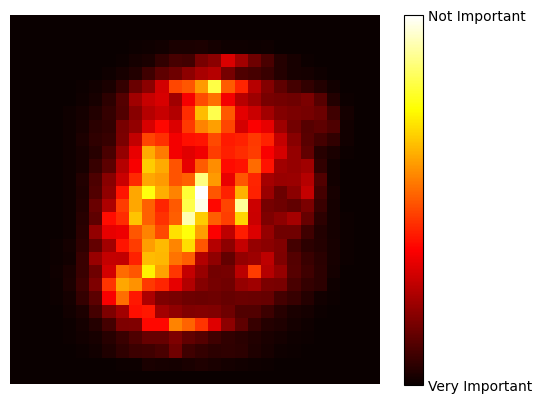

In [34]:
feature_importances = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(feature_importances, cmap="hot")
plt.axis("off")
cbar = plt.colorbar(ticks=[feature_importances.min(), feature_importances.max()])
cbar.ax.set_yticklabels(['Very Important', 'Not Important'])
cbar.ax.tick_params(length=0)
plt.show()